In [58]:
from sklearn import linear_model, datasets, model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score
import math
from sklearn.model_selection import train_test_split

0.619244216774


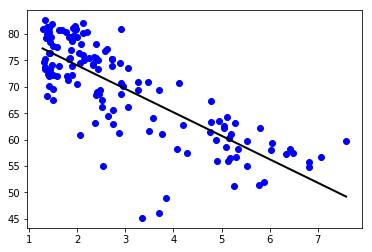

In [59]:
df = pd.read_csv('gapminder_2008.csv')

X = df['fertility'].values.reshape(-1, 1)
y = df['life'].values.reshape(-1, 1)

reg = linear_model.LinearRegression()
#res = min(X)[0] - max(X)[0]
pred_space = np.linspace(np.amin(X), np.amax(X)).reshape(-1, 1)

reg.fit(X, y)

ypred = reg.predict(pred_space)
print(reg.score(X, y))

plt.scatter(X, y, color = 'blue')
plt.plot(pred_space, ypred, color = 'black', linewidth = 2)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [61]:
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
predictions = reg_all.predict(X_test)

print(reg_all.score(X_test, y_test)*100)

##Root-Mean-Squared-Error
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(rmse)

72.9898736091
4.19402791411


In [62]:
cv_scores = model_selection.cross_val_score(reg_all, X_train, y_train, cv = 5)

In [63]:
np.mean(cv_scores)

0.54410022669220237

In [64]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [65]:
X_all = df.drop(['life', 'Region'], axis = 1).values
y_all = df['life'].values

In [66]:
%timeit cv_scores_3 = model_selection.cross_val_score(reg_all, X_all, y_all, cv=3)
%timeit cv_scores_10 = model_selection.cross_val_score(reg_all, X_all, y_all, cv=10)

3.61 ms ± 521 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
11 ms ± 297 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [67]:
lasso = linear_model.Lasso(alpha = 0.4)
lasso.fit(X_all, y_all)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
lasso_coeff = lasso.coef_
print(lasso_coeff)

[ -1.47260906e-09  -0.00000000e+00  -5.69102627e-01  -1.55747261e-01
   1.28244019e-01   1.35109382e-04  -2.29669866e-01  -1.13689989e-01]


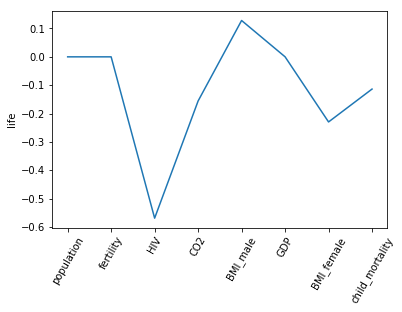

In [69]:
plt.plot(range(len(lasso_coeff)), lasso_coeff)
names = df.drop(['life', 'Region'], axis = 1).columns
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel("life")
plt.margins(0.05)
plt.show()

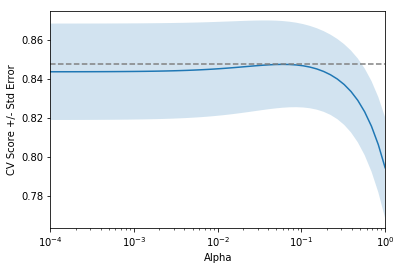

In [70]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='dashed', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = linear_model.Ridge(normalize = True)

for alpha in alpha_space:
    ridge.alpha = alpha
    
    ridge_cvscores = model_selection.cross_val_score(ridge, X_all, y_all, cv = 10)
    ridge_scores.append(np.mean(ridge_cvscores))
    ridge_scores_std.append(np.std(ridge_cvscores))
    
display_plot(ridge_scores, ridge_scores_std)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
df_diab = pd.read_csv('diabetes.csv')

In [73]:
df_diab.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
X_dia = df_diab.drop('diabetes', axis = 1).values
y_dia = df_diab['diabetes'].values
xtr, xte, ytr, yte = train_test_split(X_dia, y_dia, test_size = 0.4, random_state = 42, stratify = y_dia)

In [75]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(xtr, ytr)
y_pred = knn.predict(xte)

print(confusion_matrix(y_pred, yte))
print("\n\n", classification_report(y_pred, yte))

[[168  59]
 [ 33  48]]


              precision    recall  f1-score   support

          0       0.84      0.74      0.79       227
          1       0.45      0.59      0.51        81

avg / total       0.73      0.70      0.71       308



In [76]:
## Instantiating logistic regression classifier
logreg = linear_model.LogisticRegression()

In [77]:
logreg.fit(xtr, ytr)
y_log_pred = logreg.predict(xte)

## Using Confusion Matrix and Classification Report to calculate precision, recall and f1-score
print(confusion_matrix(y_log_pred, yte))
print("\n\n", classification_report(y_log_pred, yte))

[[173  52]
 [ 28  55]]


              precision    recall  f1-score   support

          0       0.86      0.77      0.81       225
          1       0.51      0.66      0.58        83

avg / total       0.77      0.74      0.75       308



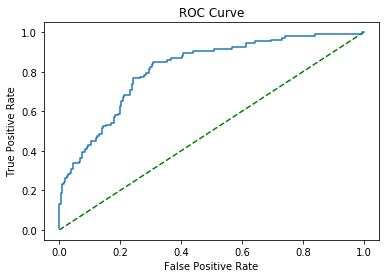

In [78]:
## Predicting Probabilities

y_pred_prob = logreg.predict_proba(xte)[:, 1]
fpr, tpr, thresholds = roc_curve(yte, y_pred_prob)
plt.plot([0,1], [0,1], "g--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [79]:
## Area under the ROC Curve using the AUC metric
auc_score = roc_auc_score(yte, y_pred_prob)
print(auc_score)

0.814386013856


In [80]:
## predicting AUC score using the Cross-Validation Set
y_pred = model_selection.cross_val_score(logreg, xte, yte, cv = 10, scoring = "roc_auc")

In [81]:
print(np.mean(y_pred))

0.785813852814


In [82]:
## Hyperparameter tuning using GridSearchCV on a K-Nearest-Neighbors Classifier
param_grid = {"n_neighbors" : np.arange(1, 50)}

k_nn = KNeighborsClassifier()
grid_cv = model_selection.GridSearchCV(k_nn, param_grid, cv = 10)

grid_cv.fit(xtr, ytr)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'n_neighbors': 40}
0.75652173913


In [83]:
## Hyperparameter tuning using GridSearchCV on a Logistic Regression Classifier
c_vals = np.logspace(-5, 8, 30)

prmGrid = {"C" : c_vals}

lreg = linear_model.LogisticRegression()
grCV = model_selection.GridSearchCV(lreg, prmGrid, cv = 10)

grCV.fit(xtr, ytr)

print(grCV.best_params_)
print(grCV.best_score_)

{'C': 2.3950266199874859}
0.79347826087


In [84]:
## RandomizedSearchCV uses DecisionTreeClassifier -> which is a lot similar to the previous classifiers but 
## has a lot of other parameters like "max_features", "max_depth", "max_samples_leaf" etc.

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

In [85]:
param_dict = {"max_features" : randint(1, 9), 
              "max_depth" : [3, None], 
              "min_samples_leaf" : randint(1, 9), 
              "criterion" : ["gini", "entropy"]}

tree = DecisionTreeClassifier()
randCV = model_selection.RandomizedSearchCV(tree, param_dict, cv = 10)

randCV.fit(xtr, ytr)
print(randCV.best_params_)
print(randCV.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 7}
0.760869565217


In [86]:
## As we know Lasso uses L1 penalty and Ridge classifier uses L2 penalty.
## Now, we shall use ElasticNet which uses the linear combination of both penalties i.e "a*l1 + b*l2"

from sklearn.linear_model import ElasticNet

l1_space = np.linspace(0, 1, 30)
## Specify the hyperparameter grid "l1_ratio" using the l1_space
par_gr = {"l1_ratio" : l1_space}
elastic_net = ElasticNet()

## Assigning the best alpha to avoid overfitting of the data
alpha_space = np.logspace(-4, 0, 50)

maxi = float("-inf")
best_alpha = alpha_space[0]

for alpha in alpha_space:
    elastic_net.alpha = alpha
    cvscores = model_selection.cross_val_score(elastic_net, xtr, ytr, cv = 10)
    mn = np.mean(cvscores)
    
    if mn > maxi:
        maxi = mn
        best_alpha = alpha
        
elastic_net.alpha = best_alpha
    
print(best_alpha)

yte = yte.reshape(-1, 1)
gm_cv = model_selection.GridSearchCV(elastic_net, par_gr, cv = 10)
gm_cv.fit(xtr, ytr)
#print(yte.shape)

y_pre = gm_cv.predict(xte)
r2 = gm_cv.score(xte, yte)
print("R-squared term:", r2)
mse = mean_squared_error(yte, y_pre)
print("Mean Squared Error:", mse)

print("Best parameters:", gm_cv.best_params_)
print("Best Score:", gm_cv.best_score_)

0.0719685673001


C:\Users\Praneet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Praneet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Praneet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Praneet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want t

R-squared term: 0.265931980725
Mean Squared Error: 0.166423520941
Best parameters: {'l1_ratio': 0.51724137931034486}
Best Score: 0.27360852955


In [87]:
## To deal with categorical features, we need to preprocess the data
## One way to do this, is to pass the dataframe to the pandas function called "pandas.get_dummies()"

## "df" already contains the "gapminder" dataset

region = pd.get_dummies(df)
print(region.head())
print(df.head())

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality  Region_America  Region_East Asia & Pacific  \
0             29.5               0                           0   
1            192.0               0                           0   
2             15.4               1                           0   
3             20.0               0                           0   
4              5.2               0                           1   

   Region_Europe & Central Asia  Region_Middle East & North Africa  \
0                             0               

In [88]:
## Box-Plot

df.boxplot("life", "Region", rot = 60)

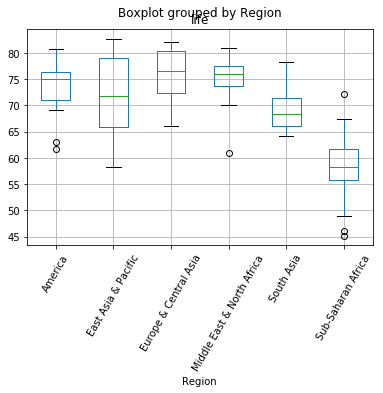

In [89]:
plt.show()

In [90]:
print(region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


In [91]:
region = region.drop("Region_America", axis = 1)

In [92]:
print(region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [93]:
region = pd.get_dummies(df, drop_first = True)
print(region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [94]:
## As we can't process the text data, we convert that into the integers

Xdat = region.drop("life", axis = 1).values
ydat = region["life"].values
trainXdat, testXdat, trainYdat, testYdat = train_test_split(Xdat, ydat, random_state = 42, test_size = 0.25)

ridgeReg = linear_model.Ridge(alpha = 0.3, normalize = True).fit(trainXdat, trainYdat)
cvScores = model_selection.cross_val_score(ridgeReg, testXdat, testYdat, cv = 5)

In [95]:
print(cvScores)

[ 0.6098284   0.96325155  0.84935562  0.88663455  0.79418869]


In [96]:
# import us_votes dataset into dataframe

us_df = pd.read_csv("us_votes.csv")
print(us_df[:15])

    republican  n  y n.1 y.1 y.2 y.3 n.2 n.3 n.4 y.4  ? y.5 y.6 y.7 n.5 y.8
0   republican  n  y   n   y   y   y   n   n   n   n  n   y   y   y   n   ?
1     democrat  ?  y   y   ?   y   y   n   n   n   n  y   n   y   y   n   n
2     democrat  n  y   y   n   ?   y   n   n   n   n  y   n   y   n   n   y
3     democrat  y  y   y   n   y   y   n   n   n   n  y   ?   y   y   y   y
4     democrat  n  y   y   n   y   y   n   n   n   n  n   n   y   y   y   y
5     democrat  n  y   n   y   y   y   n   n   n   n  n   n   ?   y   y   y
6   republican  n  y   n   y   y   y   n   n   n   n  n   n   y   y   ?   y
7   republican  n  y   n   y   y   y   n   n   n   n  n   y   y   y   n   y
8     democrat  y  y   y   n   n   n   y   y   y   n  n   n   n   n   ?   ?
9   republican  n  y   n   y   y   n   n   n   n   n  ?   ?   y   y   n   n
10  republican  n  y   n   y   y   y   n   n   n   n  y   ?   y   y   ?   ?
11    democrat  n  y   y   n   n   n   y   y   y   n  n   n   y   n   ?   ?
12    democr

In [97]:
us_df[us_df == '?'] = np.nan

In [98]:
print(us_df[:15])

    republican    n  y n.1  y.1  y.2 y.3 n.2 n.3  n.4 y.4    ?  y.5  y.6  y.7  \
0   republican    n  y   n    y    y   y   n   n    n   n    n    y    y    y   
1     democrat  NaN  y   y  NaN    y   y   n   n    n   n    y    n    y    y   
2     democrat    n  y   y    n  NaN   y   n   n    n   n    y    n    y    n   
3     democrat    y  y   y    n    y   y   n   n    n   n    y  NaN    y    y   
4     democrat    n  y   y    n    y   y   n   n    n   n    n    n    y    y   
5     democrat    n  y   n    y    y   y   n   n    n   n    n    n  NaN    y   
6   republican    n  y   n    y    y   y   n   n    n   n    n    n    y    y   
7   republican    n  y   n    y    y   y   n   n    n   n    n    y    y    y   
8     democrat    y  y   y    n    n   n   y   y    y   n    n    n    n    n   
9   republican    n  y   n    y    y   n   n   n    n   n  NaN  NaN    y    y   
10  republican    n  y   n    y    y   y   n   n    n   n    y  NaN    y    y   
11    democrat    n  y   y  

In [99]:
print(us_df.shape)
print(us_df.isnull().sum())

(434, 17)
republican      0
n              12
y              48
n.1            11
y.1            11
y.2            15
y.3            11
n.2            14
n.3            15
n.4            22
y.4             7
?              20
y.5            31
y.6            25
y.7            17
n.5            28
y.8           104
dtype: int64


In [100]:
## Anything that can transform the data from the reduced form to its original form is called Transformer
## Imputer is one such kind of transformer

from sklearn.preprocessing import Imputer

In [101]:
imp = Imputer(missing_values = "NaN", strategy = "mean", axis = 0)

xdata = us_df.drop("republican", axis = 1).values
ydata = us_df.republican
xtr, xte, ytr, yte = model_selection.train_test_split(xdata, ydata, test_size = 0.3, random_state = 42)

In [147]:
us_df = us_df.dropna()
print(us_df[:5])
pep = pd.get_dummies(us_df, drop_first = True)
print(pep[:5])
xdata = pep.drop("republican_republican", axis = 1).values
ydata = pep.republican_republican
#print(xdata[:5])
imp.fit(xdata)
xdata = imp.transform(xdata)

    republican  n  y n.1 y.1 y.2 y.3 n.2 n.3 n.4 y.4  ? y.5 y.6 y.7 n.5 y.8
4     democrat  n  y   y   n   y   y   n   n   n   n  n   n   y   y   y   y
7   republican  n  y   n   y   y   y   n   n   n   n  n   y   y   y   n   y
18    democrat  y  y   y   n   n   n   y   y   y   n  y   n   n   n   y   y
22    democrat  y  y   y   n   n   n   y   y   y   n  n   n   n   n   y   y
24    democrat  y  n   y   n   n   n   y   y   y   y  n   n   n   n   y   y
    republican_republican  n_y  y_y  n.1_y  y.1_y  y.2_y  y.3_y  n.2_y  n.3_y  \
4                       0    0    1      1      0      1      1      0      0   
7                       1    0    1      0      1      1      1      0      0   
18                      0    1    1      1      0      0      0      1      1   
22                      0    1    1      1      0      0      0      1      1   
24                      0    1    0      1      0      0      0      1      1   

    n.4_y  y.4_y  ?_y  y.5_y  y.6_y  y.7_y  n.5_y  y.8_y 

In [151]:
print(xdata.shape)

(232, 16)


In [107]:
?df.boxplot

In [110]:
## SVM is a Support vector machine and SVC is the support vector classifier
from sklearn.svm import SVC

In [111]:
impu = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
claf = SVC()
steps = [('imputation', impu), ('SVM', claf)]

In [117]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [119]:
steps = [('imputation', Imputer(missing_values='NaN', strategy = 'most_frequent', axis = 0)), ('SVM', SVC())]
pipeline = Pipeline(steps)
us_data = pd.read_csv('us_votes.csv')

In [120]:
us_data.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [128]:
newDat = pd.get_dummies(us_data, drop_first = True)

In [129]:
newDat.head()

,republican_republican,n_n,n_y,y_n,y_y,n.1_n,n.1_y,y.1_n,y.1_y,y.2_n,...,y.5_n,y.5_y,y.6_n,y.6_y,y.7_n,y.7_y,n.5_n,n.5_y,y.8_n,y.8_y
0,1,1,0,0,1,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,1,1,0,1,0
2,0,1,0,0,1,0,1,1,0,0,...,1,0,0,1,1,0,1,0,0,1
3,0,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,1
4,0,1,0,0,1,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [140]:
xda = newDat.drop('republican_republican', axis = 1).values
yda = newDat['republican_republican'].values
xtra, xtes, ytra, ytes = train_test_split(xda, yda, test_size = 0.3, random_state = 42)
pipeline.fit(xtra, ytra)
ytes = ytes.reshape(-1,1)
##print(xtra.shape)
ypred = pipeline.predict(xtes)
print(classification_report(ytes, ypred))

             precision    recall  f1-score   support

          0       0.99      0.93      0.96        83
          1       0.89      0.98      0.93        48

avg / total       0.95      0.95      0.95       131



In [152]:
from sklearn.preprocessing import scale

In [153]:
wineDF = pd.read_csv("white-wine.csv")

In [154]:
wineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [155]:
wineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [157]:
xwine = wineDF.drop("quality", axis = 1).values
ywine = wineDF.quality

In [158]:
xwine_scaled = scale(xwine)
print(np.mean(xwine), np.std(xwine))
print(np.mean(xwine_scaled), np.std(xwine_scaled))

18.4326870725 41.5449476409
2.73149729817e-15 1.0


In [186]:
from sklearn.preprocessing import StandardScaler
## Applying Scaling on a Pipeline Object
steps_wine = [('scalar', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe = Pipeline(steps_wine)
xwTrain, xwTest, ywTrain, ywTest = train_test_split(xwine, ywine, random_state = 50, test_size = 30)
pipefit = pipe.fit(xwTrain, ywTrain)
ypre = pipe.predict(xwTest)
print("Score with scaled KNN:", pipefit.score(xwTest, ywTest))

Score with scaled KNN: 0.766666666667


In [187]:
knn = KNeighborsClassifier().fit(xwTrain, ywTrain)
print("Score with un_scaled KNN:", knn.score(xwTest, ywTest))

Score with un_scaled KNN: 0.666666666667


In [203]:
stepsW = [("scalar", StandardScaler()), ("SVM", SVC())]
pipeLine = Pipeline(stepsW)
parameters = {"SVM__C":[1, 10, 100], "SVM__gamma":[0.1, 0.01]}
gridcv = model_selection.GridSearchCV(pipeLine, parameters)
##print(xwTrain[:5])
gridcv.fit(xwTrain, ywTrain)
ypre = gridcv.predict(xwTest)
print("Score: ", gridcv.score(xwTest, ywTest))
print("classification report \n", classification_report(ywTest, ypre))
print("Best params: ", gridcv.best_params_)

Score:  0.7
classification report 
              precision    recall  f1-score   support

          5       0.75      0.67      0.71         9
          6       0.70      0.88      0.78        16
          7       0.50      0.25      0.33         4
          8       0.00      0.00      0.00         1

avg / total       0.66      0.70      0.67        30

Best params:  {'SVM__C': 10, 'SVM__gamma': 0.1}


C:\Users\Praneet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [206]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [231]:
reg = pd.get_dummies(df)
xgap = reg.drop('life', axis = 1).values
ygap = reg['life'].values

stepsGap = [('imputation', Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)), 
            ('scaler', StandardScaler()), 
            ('elasticnet', ElasticNet())]

pipeGap = Pipeline(stepsGap)
parameterGap = {"elasticnet__l1_ratio" : np.linspace(0, 1, 100)}

xgTra, xgTes, ygTra, ygTes = train_test_split(xgap, ygap, random_state = 42, test_size = 0.4)

gcv = model_selection.GridSearchCV(pipeGap, parameterGap)
gcv.fit(xgTra, ygTra)
ygPred = gcv.predict(xgTes)

print("Score: {}".format(gcv.score(xgTes, ygTes)))
print("Best params: {}".format(gcv.best_params_))
ygTes = np.asarray(ygTes, dtype = np.float32)
ygPred = np.asarray(ygPred, dtype = np.float32)
##print("Classification Report: \n",classification_report(ygTes, ygPred))

print(ygTes.size, ygPred.size)

C:\Users\Praneet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Praneet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Praneet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Score: 0.8862016549771036
Best params: {'elasticnet__l1_ratio': 1.0}
56 56


In [236]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
